In [25]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tensorflow.keras.utils import to_categorical

In [26]:
df = pd.read_csv("data/train/CarDrivingIncidentInfo.csv")

In [27]:
df.head()

,wea,temp,hum,arrCar,timeSlot,acciArea,drvCond,innCond,carSpd,steeAng,acciPos
0,0,1,1,1,1,2,1,2,2,1,2
1,1,0,0,0,0,0,2,0,0,0,0
2,1,0,0,1,0,1,2,0,1,1,0
3,0,0,0,0,0,1,2,1,1,0,0
4,0,0,0,0,0,0,2,2,2,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   wea       200000 non-null  int64
 1   temp      200000 non-null  int64
 2   hum       200000 non-null  int64
 3   arrCar    200000 non-null  int64
 4   timeSlot  200000 non-null  int64
 5   acciArea  200000 non-null  int64
 6   drvCond   200000 non-null  int64
 7   innCond   200000 non-null  int64
 8   carSpd    200000 non-null  int64
 9   steeAng   200000 non-null  int64
 10  acciPos   200000 non-null  int64
dtypes: int64(11)
memory usage: 16.8 MB


In [29]:
df

,wea,temp,hum,arrCar,timeSlot,acciArea,drvCond,innCond,carSpd,steeAng,acciPos
0,0,1,1,1,1,2,1,2,2,1,2
1,1,0,0,0,0,0,2,0,0,0,0
2,1,0,0,1,0,1,2,0,1,1,0
3,0,0,0,0,0,1,2,1,1,0,0
4,0,0,0,0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,2,0,0,1,1,2,1,1,0,0,1
199996,0,1,1,1,0,1,0,0,2,1,0
199997,1,0,2,0,1,2,2,1,2,0,2
199998,0,1,0,2,1,2,0,0,0,0,0


In [30]:
X = df
Y = df['acciPos']

In [36]:
X.drop(['acciPos'], axis = 1, inplace = True)

In [37]:
X

,wea,temp,hum,arrCar,timeSlot,acciArea,drvCond,innCond,carSpd,steeAng
0,0,1,1,1,1,2,1,2,2,1
1,1,0,0,0,0,0,2,0,0,0
2,1,0,0,1,0,1,2,0,1,1
3,0,0,0,0,0,1,2,1,1,0
4,0,0,0,0,0,0,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
199995,2,0,0,1,1,2,1,1,0,0
199996,0,1,1,1,0,1,0,0,2,1
199997,1,0,2,0,1,2,2,1,2,0
199998,0,1,0,2,1,2,0,0,0,0


In [38]:
Y

0         2
1         0
2         0
3         0
4         0
         ..
199995    1
199996    0
199997    2
199998    0
199999    1
Name: acciPos, Length: 200000, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
model = Sequential([
    Dense(10, input_dim = 10, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dropout(0.25),
    Dense(10, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [46]:
tensorboard = keras.callbacks.TensorBoard(log_dir = './graph',
                                         histogram_freq = 0,
                                         write_graph = True,
                                         write_images = True)

hist = model.fit(X_train, y_train, batch_size = 2000, epochs = 50,
                 callbacks = [tensorboard], validation_data = (X_test, y_test))

Epoch 1/50
20/20 [==============================] - 2s 45ms/step - loss: 0.9889 - accuracy: 0.5099 - val_loss: 0.9309 - val_accuracy: 0.5323
Epoch 2/50
20/20 [==============================] - 0s 19ms/step - loss: 0.8996 - accuracy: 0.5404 - val_loss: 0.8519 - val_accuracy: 0.5596
Epoch 3/50
20/20 [==============================] - 0s 19ms/step - loss: 0.8317 - accuracy: 0.5723 - val_loss: 0.7847 - val_accuracy: 0.6071
Epoch 4/50
20/20 [==============================] - 0s 24ms/step - loss: 0.7689 - accuracy: 0.6204 - val_loss: 0.7198 - val_accuracy: 0.6627
Epoch 5/50
20/20 [==============================] - 0s 23ms/step - loss: 0.7080 - accuracy: 0.6689 - val_loss: 0.6571 - val_accuracy: 0.7059
Epoch 6/50
20/20 [==============================] - 1s 29ms/step - loss: 0.6519 - accuracy: 0.7036 - val_loss: 0.5981 - val_accuracy: 0.7375
Epoch 7/50
20/20 [==============================] - 1s 27ms/step - loss: 0.5950 - accuracy: 0.7375 - val_loss: 0.5438 - val_accuracy: 0.7656
Epoch 8/50
20

In [49]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.029209991917014122, 0.9890124797821045]


In [56]:
hist.history['loss']

[0.9888992309570312,
 0.8995763659477234,
 0.8317211866378784,
 0.7689236402511597,
 0.7080419659614563,
 0.6519428491592407,
 0.5950313210487366,
 0.5452038049697876,
 0.4983905255794525,
 0.45724156498908997,
 0.41427984833717346,
 0.37509459257125854,
 0.33575183153152466,
 0.3034161627292633,
 0.2714231312274933,
 0.24435175955295563,
 0.22189177572727203,
 0.20221400260925293,
 0.18535368144512177,
 0.17106777429580688,
 0.16020779311656952,
 0.14860479533672333,
 0.13937199115753174,
 0.12996384501457214,
 0.12145545333623886,
 0.11312198638916016,
 0.10669393092393875,
 0.09919892251491547,
 0.09373368322849274,
 0.08720365911722183,
 0.08306342363357544,
 0.07819822430610657,
 0.07180551439523697,
 0.06955642998218536,
 0.06577003002166748,
 0.06241155415773392,
 0.05867772921919823,
 0.05597209557890892,
 0.052576158195734024,
 0.049926478415727615,
 0.04836270585656166,
 0.047311656177043915,
 0.04602555185556412,
 0.044727593660354614,
 0.04255012050271034,
 0.04218609258532

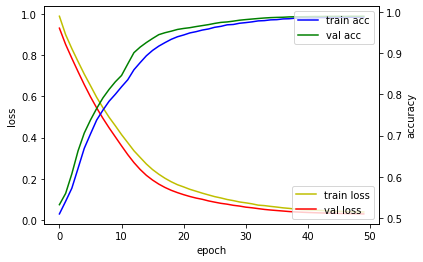

In [58]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')
loss_ax.legend(loc = 'lower right')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc = 'upper right')

plt.show()


<Figure size 432x288 with 0 Axes>

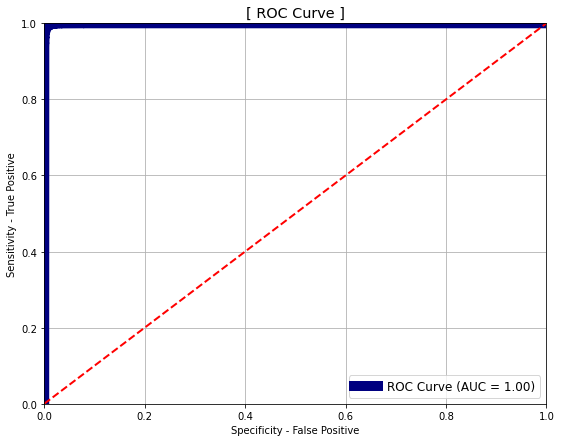

In [60]:
y_predict_result = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_predict_result.ravel())
roc_auc = auc(fpr, tpr)

plt.clf()
plt.figure(figsize = (9, 7))
plt.plot(fpr, tpr, color = 'navy', lw = 10, label = 'ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('[ ROC Curve ]')
plt.xlabel('Specificity - False Positive')
plt.ylabel('Sensitivity - True Positive')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [61]:
from keras.models import load_model

model.save("C://models/smartcar_dnn_model.h5")